<a href="https://colab.research.google.com/github/AtifQureshi110/CNN/blob/main/happy_and_sad_img_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed an image classification system to distinguish between happy and sad individuals using TensorFlow and OpenCV libraries. Processed and prepared image data by scaling and splitting into training and testing sets. Designed and implemented a deep learning model utilizing Conv2D, MaxPooling2D, Dense, Flatten, and Dropout layers, including 3 sets of Conv2D and MaxPooling layers. Evaluated model performance through training, loss, and accuracy analysis, visualizing results with graphs, and conducted testing using the predict method.

In [ ]:
# Install and import Dependencies and Setup
import tensorflow as tf
import os

In [ ]:
# Remove dodgy images
import cv2
import imghdr

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
data_dir = r"/content/drive/MyDrive/BERT/Transformers/Selceted for interview/CCN/data_dir"

In [ ]:
img = cv2.imread(os.path.join("data_dir","happy people","/content/drive/MyDrive/BERT/Transformers/Selceted for interview/CCN/data_dir/happy people/-happy-people-concept-two-smiling-girls-showing-thumbs-up-over-american-flag.jpg"))

In [ ]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(1198, 1300, 3)


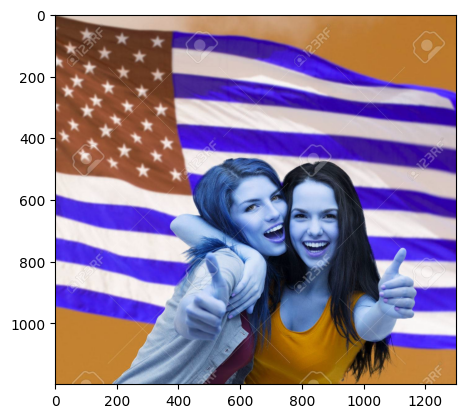

In [ ]:
plt.imshow(img)

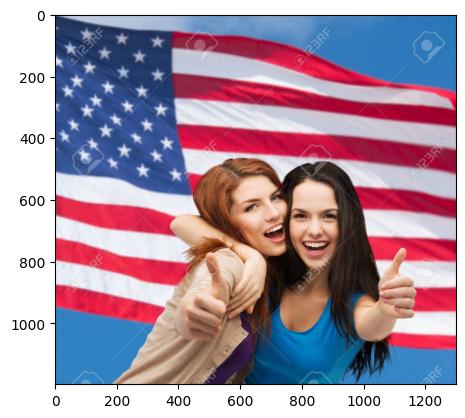

In [ ]:
# to fix the colors
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
for image_class in os.listdir(data_dir):
  # print(image_class) #print the name of the folder
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    # print(image) # print the names of individuals images
    try:
      img = cv2.imread(image_path) # reading an image file using OpenCV's
      tip = imghdr.what(image_path) # used to determine the type of image file based on its content.
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      # os.remove(image_path)

In [ ]:
# Load Data
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/BERT/Transformers/Selceted for interview/CCN/data_dir')

Found 196 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [ ]:
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# class 1 - sad people
# class 0 - happy people
batch[1]

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int32)

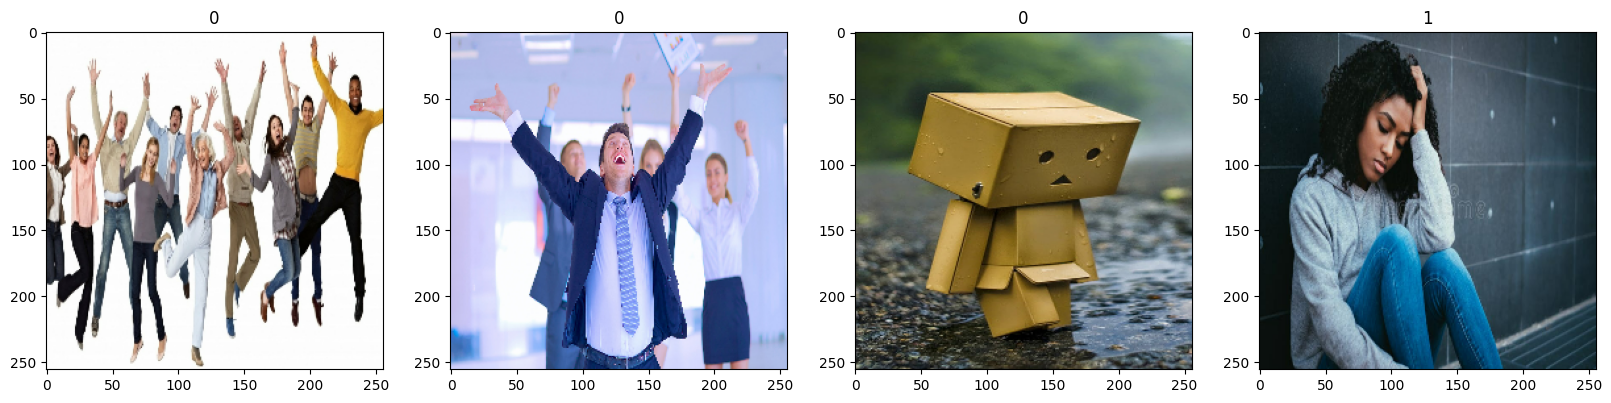

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][0:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch[0].min()

0.0

In [ ]:
batch[1].max()

1

In [ ]:
scaled = batch[0]/255

In [ ]:
scaled.min()

0.0

In [ ]:
scaled.max()

1.0

In [ ]:
# preprocessing image i) scaling. ii) split -> training, testing, validation
# Scale Data b/w 0 and 1 enable DL model generalizes faster and produce better results.
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scale_iterator = data.as_numpy_iterator()

In [ ]:
batch = scale_iterator.next()

In [ ]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


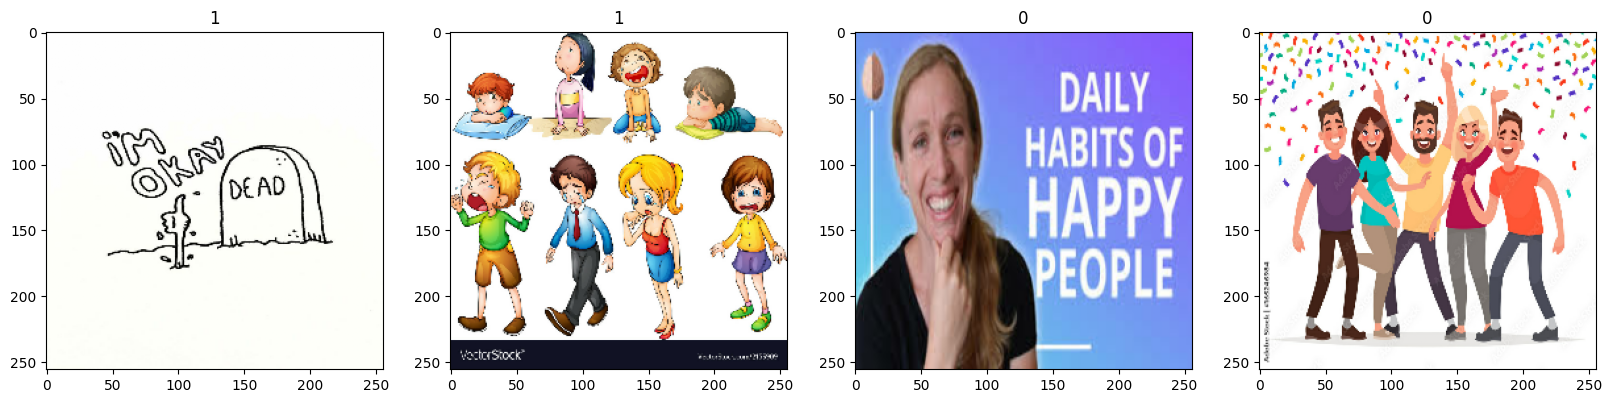

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][0:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Split Data
len(data)

7

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
print(train_size)
print(val_size)
print(test_size)

4
2
1


In [ ]:
print(train_size+val_size+test_size)

7


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
print(len(train))
print(len(val))
print(len(test))

4
2
1


In [ ]:
#  Build Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()
# 1st convolution bock
# 1 for the stride
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256,3)))
model.add(MaxPooling2D())

# 2nd convolution bock
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256, 256,3)))
model.add(MaxPooling2D())

# 3nd convolution bock
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256,3)))
model.add(MaxPooling2D())


model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [ ]:
#Train
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 18s 4s/step - loss: 1.2626 - accuracy: 0.4922 - val_loss: 0.7974 - val_accuracy: 0.3906
Epoch 2/20
4/4 [==============================] - 15s 3s/step - loss: 0.6505 - accuracy: 0.5938 - val_loss: 0.5618 - val_accuracy: 0.6719
Epoch 3/20
4/4 [==============================] - 11s 3s/step - loss: 0.6006 - accuracy: 0.6250 - val_loss: 0.5552 - val_accuracy: 0.7031
Epoch 4/20
4/4 [==============================] - 14s 3s/step - loss: 0.5481 - accuracy: 0.7500 - val_loss: 0.4918 - val_accuracy: 0.7969
Epoch 5/20
4/4 [==============================] - 11s 2s/step - loss: 0.4785 - accuracy: 0.7969 - val_loss: 0.4277 - val_accuracy: 0.7500
Epoch 6/20
4/4 [==============================] - 11s 3s/step - loss: 0.4020 - accuracy: 0.7891 - val_loss: 0.3193 - val_accuracy: 0.9531
Epoch 7/20
4/4 [==============================] - 12s 3s/step - loss: 0.3257 - accuracy: 0.9141 - val_loss: 0.3043 - val_accuracy: 0.8594
Epoch 8/20
4/4 [==================

In [ ]:
hist.history

{'loss': [1.2626054286956787,
  0.6504629850387573,
  0.600567102432251,
  0.5480955839157104,
  0.4785025715827942,
  0.40196144580841064,
  0.32568204402923584,
  0.23456335067749023,
  0.25703489780426025,
  0.22607573866844177,
  0.20822015404701233,
  0.20550207793712616,
  0.16703365743160248,
  0.12562507390975952,
  0.10829104483127594,
  0.08907446265220642,
  0.07358622550964355,
  0.06562236696481705,
  0.0423421710729599,
  0.027038399130105972],
 'accuracy': [0.4921875,
  0.59375,
  0.625,
  0.75,
  0.796875,
  0.7890625,
  0.9140625,
  0.9296875,
  0.921875,
  0.8984375,
  0.921875,
  0.8984375,
  0.9453125,
  0.953125,
  0.96875,
  0.9765625,
  0.984375,
  0.9765625,
  0.9921875,
  1.0],
 'val_loss': [0.7973842620849609,
  0.561806321144104,
  0.555248498916626,
  0.4917551279067993,
  0.4276808500289917,
  0.3193347454071045,
  0.30434390902519226,
  0.22496268153190613,
  0.16883008182048798,
  0.22763890027999878,
  0.15641719102859497,
  0.12002933770418167,
  0.1045

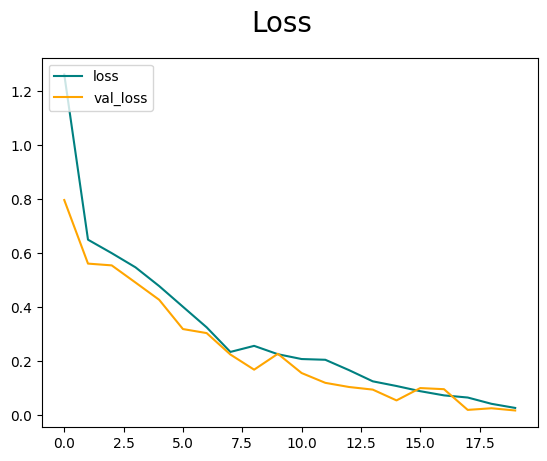

In [ ]:
# Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

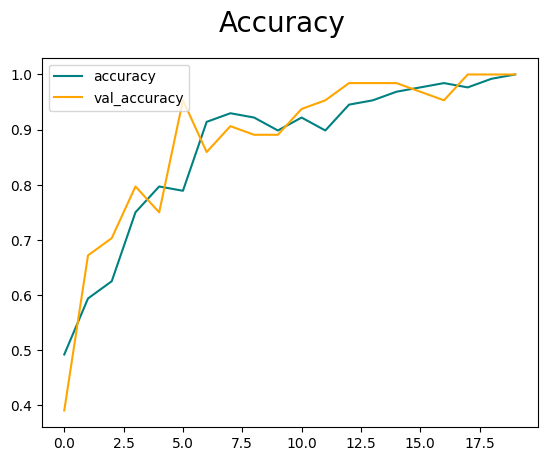

In [ ]:

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 160ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


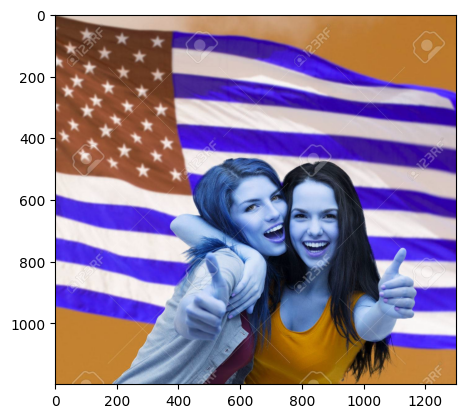

In [ ]:
# Test
import cv2
img = cv2.imread('/content/drive/MyDrive/BERT/Transformers/Selceted for interview/CCN/data_dir/happy people/-happy-people-concept-two-smiling-girls-showing-thumbs-up-over-american-flag.jpg')
plt.imshow(img)
plt.show()

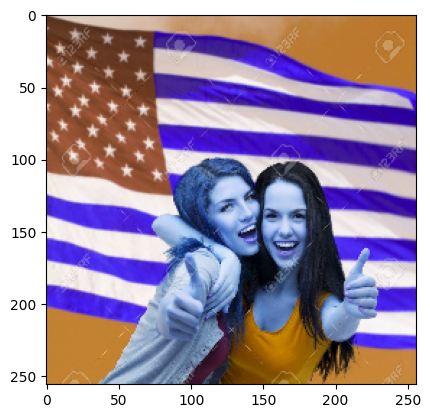

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [ ]:
yhat

array([[0.0010978]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [ ]:
#Save the Model
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('/content/models/imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 90ms/step


array([[0.0010978]], dtype=float32)